In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install google-cloud-bigquery google-cloud-bigquery-storage
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install db-dtypes
!{sys.executable} -m pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install google-cloud-bigquery google-cloud-bigquery-storage

from google.cloud import bigquery

client = bigquery.Client()

Defaulting to user installation because normal site-packages is not writeable


/Users/alexanderzermeno/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/alexanderzermeno/Library/Python/3.9/lib/python/site-packages/google/api_core/_python_version_support.py:246: FutureWarning: You are using a non-supported Python version (3.9.6). Google will not post any further updates to google.api_core supporting this Python version. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/alexanderzermeno/Library/Python/3.9/lib/python/site-packages/google/auth/__init__.py:54: FutureWarning: 
    You are using a Python version 3.9 past its end of life. Google will update
    google-auth with critical bug fixes on a best-effort basis, but not
    with any other fixes or featu

In [3]:
table_id = "zeta-surf-483601-j1.bus672_compustat.annual_data2000_2025"
table = client.get_table(table_id)

print("Table:", table.full_table_id)
print("Rows:", table.num_rows)
print("Size (MB):", round(table.num_bytes / (1024 * 1024), 2))
print("Created:", table.created)
print("Last modified:", table.modified)

Table: zeta-surf-483601-j1:bus672_compustat.annual_data2000_2025
Rows: 315467
Size (MB): 714.92
Created: 2026-01-15 01:21:02.937000+00:00
Last modified: 2026-01-15 04:02:26.280000+00:00


In [4]:
query = """
SELECT *
FROM `zeta-surf-483601-j1.bus672_compustat.annual_data2000_2025`
LIMIT 10
"""

df = client.query(query).to_dataframe()
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1050,2002-12-31,2002,INDL,C,D,STD,CECO,125141101,CECO ENVIRONMENTAL CORP,...,1,3564,345,925,B-,TX,0,www.cecoenviro.com,NaT,NaT
1,1062,2023-11-30,2023,FS,C,D,STD,ASA,G3156P103,ASA GOLD AND PRECIOUS METALS,...,1,6799,850,800,None,ME,0,www.asaltd.com,NaT,NaT
2,1072,2001-03-31,2000,INDL,C,D,STD,AVX,002444107,AVX CORP,...,1,3670,220,925,B-,SC,0,www.kyocera-avx.com,2020-03-31,1973-03-01
3,1072,2005-03-31,2004,INDL,C,D,STD,AVX,002444107,AVX CORP,...,1,3670,220,925,B-,SC,0,www.kyocera-avx.com,2020-03-31,1973-03-01
4,1076,2004-12-31,2004,INDL,C,D,STD,PRG,74319R101,PROG HOLDINGS INC,...,1,6141,175,976,B,UT,0,progholdings.com,NaT,NaT


   fyear   total_sales    avg_sales
0   <NA>           NaN          NaN
1   1999  2.599225e+06  1742.107980
2   2000  1.729849e+07  1550.043653
3   2001  1.746473e+07  1651.042636
4   2002  1.727227e+07  1696.353258


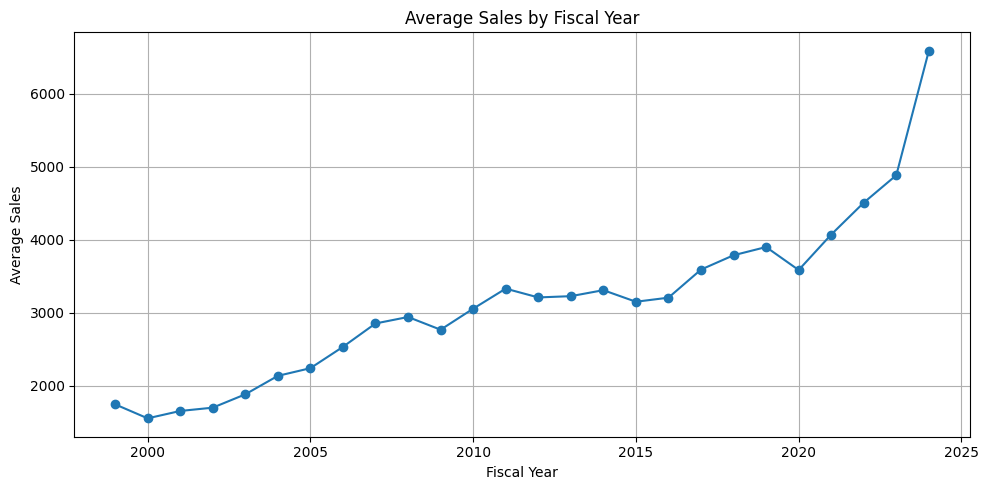

In [5]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt


def main():
    # 1. Create BigQuery client
    client = bigquery.Client(project="zeta-surf-483601-j1")

    # 2. SQL query
    query = """
    SELECT
      fyear,
      SUM(sale) AS total_sales,
      AVG(sale) AS avg_sales
    FROM `zeta-surf-483601-j1.bus672_compustat.annual_data2000_2025`
    GROUP BY fyear
    ORDER BY fyear;
    """

    # 3. Run query and load into pandas DataFrame
    df = client.query(query).to_dataframe()

    # Print first few rows
    print(df.head())

    # 4. Plot yearly avg_sales
    plt.figure(figsize=(10,5))
    plt.plot(df["fyear"], df["avg_sales"], marker="o")
    plt.title("Average Sales by Fiscal Year")
    plt.xlabel("Fiscal Year")
    plt.ylabel("Average Sales")
    plt.grid(True)
    plt.tight_layout()

    # 5. Show plot
    plt.show()


if __name__ == "__main__":
    main()